
<img src="ALMAARC.png" width="250" height="240"  align="right"/> 



<hr style="border:2px solid darkblue"> </hr>

# NB6. Query By Frequency Coverage

<hr style="border:2px solid darkblue"> </hr>







In [2]:
import numpy as np
from astropy.table import Table
import pyvo
import pandas as pd
import matplotlib.pyplot as plt
service = pyvo.dal.TAPService("https://almascience.eso.org/tap")



<hr style="border:2px solid darkblue"> </hr>

## Query observations covering a frequency range

<hr style="border:2px solid darkblue"> </hr>

The ALMA archive data set provide the central wavelengths of the observations under the columns *frequency*. In this function we see which observations have their central frequency within a given range.

In [6]:
def query_spec_range(sci_cat, freq_min, freq_max): ##in GHz


    query = f"""   
            SELECT   
             *   
            FROM ivoa.obscore   
            WHERE   
            frequency < {freq_max}   
            AND   
            frequency > {freq_min}   
             """
    
    return service.search(query).to_table().to_pandas()

<hr style="border:2px solid darkblue"> </hr>

## Plot all frequency ranges covered by one source

<hr style="border:2px solid darkblue"> </hr>

This function allows the user to read out all frequecy ranges covered for one source.

To achieve this we need to use the *frequency_support column*. This column contains strings including the frequency limits of each spectral window within each measurent set, sensivity and polarization information.

We will show how to apply this function for a source in example 6b.

In [17]:
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import re



def plot_all_freq(output_table):

    def read_band_freq(frequency_support_entry):
        """
        This function reads the string from the frequency_support column and returns 
        the lower and upper frequencies of each band.
        """

        sb = re.split(' U ',frequency_support_entry)
        minfreq = []
        maxfreq = []
        for i in range(len(sb)):
            sbi = sb[i].replace('GHz', '').replace('[', '').replace('..', 'U').replace(']', '').replace('GHz', '') 
            sb_s = re.split(',',sbi)
            freq_cov = re.split('U',sb_s[0])
            minfreq.append(np.array(freq_cov).astype('float')[0])
            maxfreq.append(np.array(freq_cov).astype('float')[1])

        return minfreq,maxfreq


    plt.rcParams["figure.figsize"] = (20,20)
    fig, ax = plt.subplots()
    ax.plot([0,len(output_table['frequency_support'])],[84,480], alpha = 0)

    for i in range(len(output_table['frequency_support'])):  #for each row of the data set  
        for j in range(len(read_band_freq(output['frequency_support'][i])[0])): #for each spectral window covered 
                                                                                #within each measurement
            freq_min = read_band_freq(output_table['frequency_support'][i])[0][j]
            freq_max = read_band_freq(output_table['frequency_support'][i])[1][j]
            left, bottom, width, height = (i, freq_min, 0.5,  freq_max- freq_min )
            ax.add_patch(Rectangle((left,bottom),width,height))

    ### Code each band
    ax.add_patch(Rectangle((-3,84),2,116-84, facecolor = 'blue'))
    ax.add_patch(Rectangle((-3,125),2,163-125, facecolor = 'red'))
    ax.add_patch(Rectangle((-3,163),2,211-163, facecolor = 'green'))
    ax.add_patch(Rectangle((-3,211),2,275-211, facecolor = 'orange'))
    ax.add_patch(Rectangle((-3,275),2,373-275, facecolor = 'yellow'))
    ax.add_patch(Rectangle((-3,385),2,500-385, facecolor = 'magenta'))

    plt.title('Frequency coverage for "SPT0311-58"',fontsize=15)
    plt.xlabel('Observations',fontsize=15)
    plt.ylabel('Frequency [GHz]',fontsize=15)



<hr style="border:2px solid darkblue"> </hr>

## Examples

<hr style="border:2px solid darkblue"> </hr>


-------------------------------------------------------------

## Example6a: Query all active galaxies with central frequencies between 300-400 GHz


In [7]:
output = query_spec_range('Active galaxies',  300, 400)


               SELECT                *               FROM ivoa.obscore               WHERE               frequency < 400               AND               frequency > 300                


In [8]:
output['freq_max'] = output['frequency'][0]+(output['bandwidth'][0]/1e9/2)
output['freq_min'] = output['frequency'][0]-(output['bandwidth'][0]/1e9/2)

Text(0.5, 0, 'Objects')

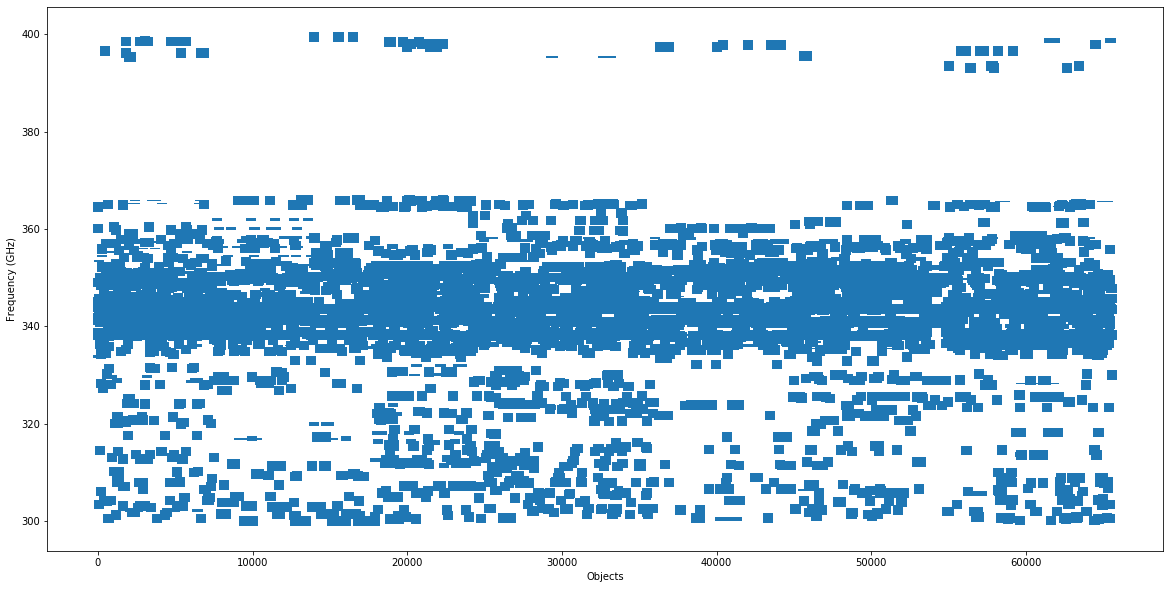

In [9]:
plt.rcParams["figure.figsize"] = (20,10)
plt.errorbar(np.arange(len(output['frequency'])), output['frequency'], yerr=output['bandwidth']/1e9/2, 
    elinewidth = 10,marker = '',ls = '')
plt.ylabel('Frequency (GHz)')
plt.xlabel('Objects')


-------------------------------------------------------------

## Example 6b: Display all frequencies covered for one source

We first need to query all observations available for one specific source. In this case its the sub-mm galaxy SPT0311-58:

In [12]:
query = f"""  
        SELECT  * 
        FROM ivoa.obscore  
        WHERE   
        target_name = 'SPT0311-58' 
         """
result = service.search(query)
output = result.to_table().to_pandas()
output

,access_url,access_format,proposal_id,data_rights,gal_longitude,gal_latitude,obs_publisher_did,obs_collection,facility_name,instrument_name,...,frequency,velocity_resolution,obs_creator_name,pub_title,first_author,qa2_passed,bib_reference,science_keyword,scientific_category,lastModified
0,http://almascience.org/aq?member_ous_id=uid://...,text/html,2015.1.00504.S,Public,274.786932,-50.383799,ADS/JAO.ALMA#2015.1.00504.S,ALMA,JAO,ALMA,...,103.198162,21449.507093,"Strandet, Maria",Galaxy growth in a massive halo in the first b...,"Marrone, D. P. Reuter, C. Strandet, M. L.",T,2017ApJ...842L..15S 2018Natur.553...51M 2020Ap...,Sub-mm Galaxies (SMG),Galaxy evolution,2021-06-16T16:46:50.431
1,http://almascience.org/aq?member_ous_id=uid://...,text/html,2018.1.00575.S,Public,274.784641,-50.380313,ADS/JAO.ALMA#2018.1.00575.S,ALMA,JAO,ALMA,...,305.107792,7527.873839,"Marrone, Dan",,,T,,Sub-mm Galaxies (SMG),Galaxy evolution,2021-06-16T16:46:50.431
2,http://almascience.org/aq?member_ous_id=uid://...,text/html,2018.1.00575.S,Public,274.784641,-50.380313,ADS/JAO.ALMA#2018.1.00575.S,ALMA,JAO,ALMA,...,305.107792,7527.873839,"Marrone, Dan",,,T,,Sub-mm Galaxies (SMG),Galaxy evolution,2021-06-16T16:46:50.431
3,http://almascience.org/aq?member_ous_id=uid://...,text/html,2018.1.00575.S,Public,274.784641,-50.380313,ADS/JAO.ALMA#2018.1.00575.S,ALMA,JAO,ALMA,...,305.107792,7527.873839,"Marrone, Dan",,,T,,Sub-mm Galaxies (SMG),Galaxy evolution,2021-06-16T16:46:50.431
4,http://almascience.org/aq?member_ous_id=uid://...,text/html,2018.1.00575.S,Public,274.784641,-50.380313,ADS/JAO.ALMA#2018.1.00575.S,ALMA,JAO,ALMA,...,305.107792,7527.873839,"Marrone, Dan",,,T,,Sub-mm Galaxies (SMG),Galaxy evolution,2021-06-16T16:46:50.431
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,http://almascience.org/aq?member_ous_id=uid://...,text/html,2016.1.01293.S,Public,274.784641,-50.380313,ADS/JAO.ALMA#2016.1.01293.S,ALMA,JAO,ALMA,...,233.560242,9733.368689,"Marrone, Dan",ALMACAL VII: first interferometric number coun...,"Klitsch, A. Marrone, D. P. Strandet, M. L.",T,2017ApJ...842L..15S 2018Natur.553...51M 2020MN...,Sub-mm Galaxies (SMG),Galaxy evolution,2021-06-16T16:46:50.431
68,http://almascience.org/aq?member_ous_id=uid://...,text/html,2016.1.00231.S,Public,274.786932,-50.383799,ADS/JAO.ALMA#2016.1.00231.S,ALMA,JAO,ALMA,...,343.504201,26805.294177,"Strandet, Maria",,,T,,"Starburst galaxies, Sub-mm Galaxies (SMG)",Active galaxies,2021-06-16T16:46:50.431
69,http://almascience.org/aq?member_ous_id=uid://...,text/html,2016.1.00231.S,Public,274.786932,-50.383799,ADS/JAO.ALMA#2016.1.00231.S,ALMA,JAO,ALMA,...,343.504201,26805.294177,"Strandet, Maria",,,T,,"Starburst galaxies, Sub-mm Galaxies (SMG)",Active galaxies,2021-06-16T16:46:50.431
70,http://almascience.org/aq?member_ous_id=uid://...,text/html,2016.1.00231.S,Public,274.786932,-50.383799,ADS/JAO.ALMA#2016.1.00231.S,ALMA,JAO,ALMA,...,343.504201,26805.294177,"Strandet, Maria",,,T,,"Starburst galaxies, Sub-mm Galaxies (SMG)",Active galaxies,2021-06-16T16:46:50.431


We can now use the function *read_band_freq()* to visualize the frequency coverage of each spectral window observed for this source.

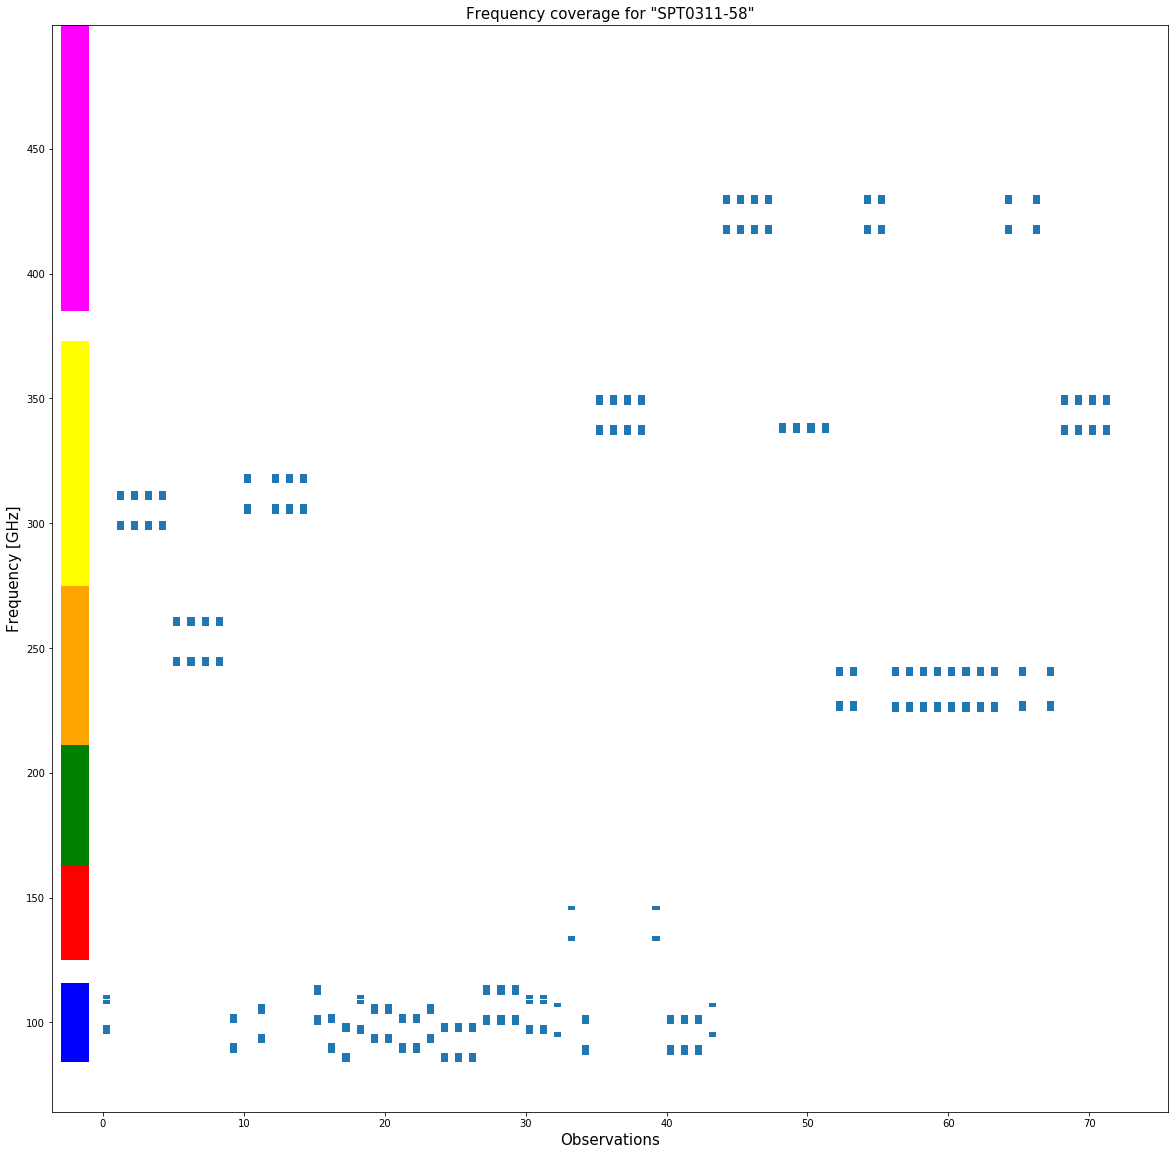

In [16]:
plot_all_freq(output)